In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read the file
restaurant = pd.read_csv('tripadvisor_european_restaurants.csv')

/Users/Anh/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

## 1. Cleaning dataset

In [4]:
# create a list that contains the columns we need
columns = ['country', 'region', 'price_level',
           'vegetarian_friendly', 'vegan_options', 'gluten_free', 
           'open_days_per_week', 'cuisines', 'features', 'avg_rating','total_reviews_count']

In [5]:
# filter our dataset to keep only the columns needed
restaurant = restaurant.loc[:, columns]

In [6]:
restaurant.head()

,country,region,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,cuisines,features,avg_rating,total_reviews_count
0,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0,36.0
1,France,Nouvelle-Aquitaine,€,N,N,N,NaN,NaN,NaN,4.0,5.0
2,France,Centre-Val de Loire,€,N,N,N,NaN,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0,13.0
3,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0,34.0
4,France,Occitanie,€€-€€€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5,11.0


In [7]:
# filter the dataset to keep restaurants in France
restaurant = restaurant.loc[restaurant.country == 'France']

In [8]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155288 entries, 0 to 155287
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              155288 non-null  object 
 1   region               155286 non-null  object 
 2   price_level          125483 non-null  object 
 3   vegetarian_friendly  155288 non-null  object 
 4   vegan_options        155288 non-null  object 
 5   gluten_free          155288 non-null  object 
 6   open_days_per_week   85446 non-null   float64
 7   cuisines             132871 non-null  object 
 8   features             61372 non-null   object 
 9   avg_rating           144475 non-null  float64
 10  total_reviews_count  148816 non-null  float64
dtypes: float64(3), object(8)
memory usage: 14.2+ MB


In [9]:
restaurant.describe()

,open_days_per_week,avg_rating,total_reviews_count
count,85446.000000,144475.000000,148816.000000
mean,6.111181,4.018090,105.015959
std,0.961764,0.726801,209.642053
min,1.000000,1.000000,0.000000
25%,6.000000,3.500000,8.000000
50%,6.000000,4.000000,34.000000
75%,7.000000,4.500000,115.000000
max,7.000000,5.000000,15188.000000


In [10]:
# clean the Features column in order to create a numerical column for the Reservation feature (with boolean values)
restaurant["reservation"] = np.where(restaurant.features.str.contains('Reservations') == True, 1, 0)

In [11]:
# clean the Cuisine colupmn in order to create numerical columns for each type of cuisine (with boolean values)
restaurant["cuisine_fr"] = np.where(restaurant.cuisines.str.contains('French') == True, 1, 0)
restaurant["cuisine_it"] = np.where(restaurant.cuisines.str.contains('Italian') == True, 1, 0)
restaurant["cuisine_ch"] = np.where(restaurant.cuisines.str.contains('Chinese') == True, 1, 0)
restaurant["cuisine_ff"] = np.where(restaurant.cuisines.str.contains('Fast food') == True, 1, 0)
restaurant["cuisine_jp"] = np.where(restaurant.cuisines.str.contains('Japanese') == True, 1, 0)

In [12]:
# clean the 3 columns vegetarian_friendly, vegan_options, gluten_free in order to have numerical values (boolean values)
restaurant['vegetarian'] = np.where(restaurant.vegetarian_friendly == 'N', 0, 1)
restaurant['vegan'] = np.where(restaurant.vegan_options == 'N', 0, 1)
restaurant['gluten'] = np.where(restaurant.gluten_free == 'N', 0, 1)


In [13]:
# clean the Price_level column in order to have numerical values
restaurant = pd.concat([restaurant, pd.get_dummies(restaurant.price_level)], axis=1)

## 2. Macro analysis

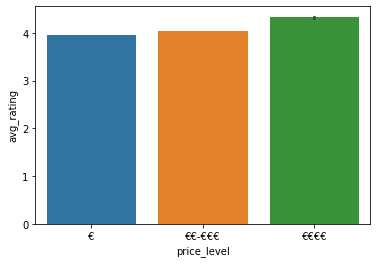

In [14]:
# bar plot between price range and the rate
sns.barplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating')

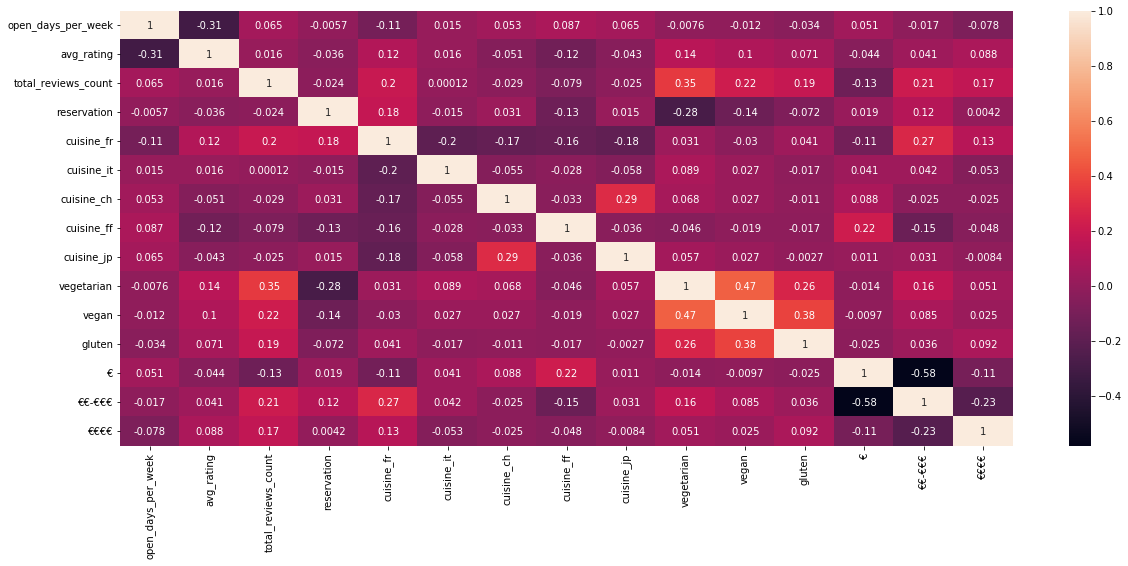

In [15]:
# correlation heat map between our target variable and the other variables
plt.figure(figsize = (20,8)) 
sns.heatmap(restaurant.corr(), annot = True)

## 3. Detail analysis on numerical data

**a. Cuisine type**

In [16]:
# keep only restaurants with 1 type of cuisine : filter on multiple cuisines and NaN restaurants
restaurant_2 = restaurant.loc[(restaurant.cuisine_fr + 
                               restaurant.cuisine_ff + 
                               restaurant.cuisine_jp + 
                               restaurant.cuisine_ch + 
                               restaurant.cuisine_it) == 1]

In [17]:
# unpivot the cuisine type columns into tidy data
rest_cuisine = restaurant_2.melt(id_vars = 'avg_rating',
                                value_vars = ['cuisine_fr', 'cuisine_jp', 'cuisine_it', 'cuisine_ff', 'cuisine_ch'],
                                var_name = 'type_cuisine',
                                value_name = 'value')

In [18]:
# clean the new dataset on the type of cuisine
rest_cuisine = rest_cuisine.loc[rest_cuisine.value != 0]

In [19]:
rest_cuisine.head()

,avg_rating,type_cuisine,value
0,4.0,cuisine_fr,1
1,5.0,cuisine_fr,1
2,4.0,cuisine_fr,1
3,4.5,cuisine_fr,1
4,4.5,cuisine_fr,1


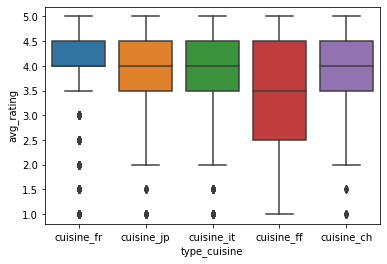

In [20]:
sns.boxplot(data=rest_cuisine, 
            x = 'type_cuisine',
            y = 'avg_rating')

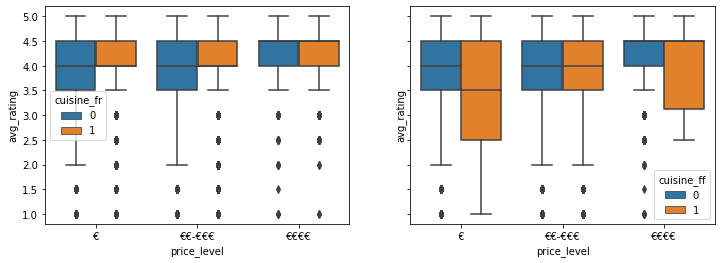

In [21]:
# focus on cuisine_fr and cuisine_ff with different price ranges
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.boxplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating',
            hue = 'cuisine_ff',
            ax=axes[1])
sns.boxplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating',
            hue = 'cuisine_fr',
            ax=axes[0])

**b. Special diet**

In [22]:
# create dataframes for each type of special diet
vege = restaurant[restaurant.vegetarian==1].groupby(by= ['avg_rating'])[['vegetarian']].count().reset_index()

In [23]:
vega = restaurant[restaurant.vegan==1].groupby(by= ['avg_rating'])[['vegan']].count().reset_index()

In [24]:
glu = restaurant[restaurant.gluten==1].groupby(by= ['avg_rating'])[['gluten']].count().reset_index()

In [25]:
# merge the 3 dataframes in one
restaurant_3 = pd.merge(vege,vega,on='avg_rating')
restaurant_3 = pd.merge(restaurant_3,glu,on='avg_rating')

In [26]:
# unpivot the 3 special diet columns into tidy data
rest_diet = restaurant_3.melt(id_vars = 'avg_rating',
                                value_vars = ['vegetarian','vegan','gluten'],
                                var_name = 'diet',
                                value_name = 'count')

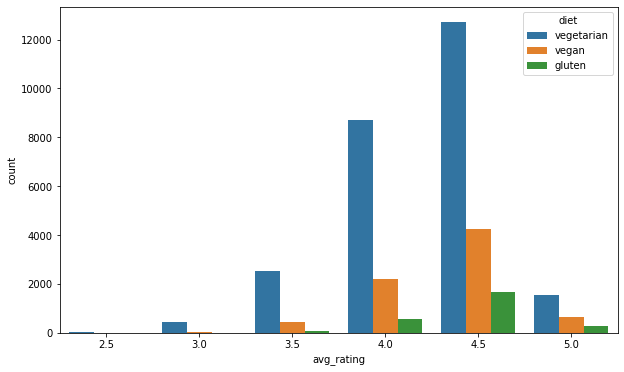

In [27]:
plt.figure(figsize = (10,6)) 
sns.barplot(data=rest_diet,
            x='avg_rating',
            y='count',
            hue='diet')

**c. Review count**

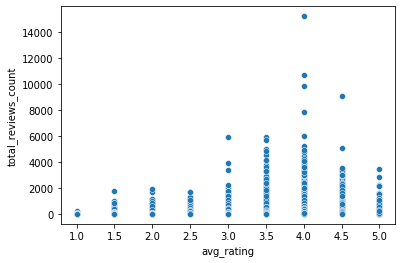

In [28]:
sns.scatterplot(data=restaurant,
                x='avg_rating',
                y='total_reviews_count')

In [29]:
# create dataframe to analyze impact of total number of reviews and price range on the rate
rest_reviews = restaurant.groupby(by=['avg_rating','price_level'])[['total_reviews_count']].sum().reset_index()

In [30]:
rest_reviews.columns

Index(['avg_rating', 'price_level', 'total_reviews_count'], dtype='object')

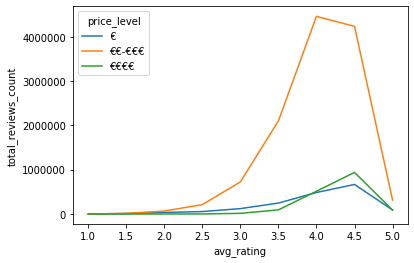

In [31]:
sns.lineplot(data=rest_reviews,
                x='avg_rating',
                y='total_reviews_count',
                hue='price_level')

**d. Open days per week**

In [32]:
rest_open = restaurant[restaurant.open_days_per_week > 0]

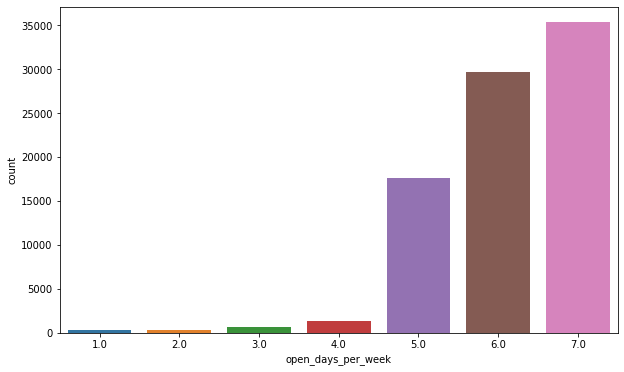

In [33]:
plt.figure(figsize = (10,6))
sns.countplot(data=rest_open,
             x='open_days_per_week')

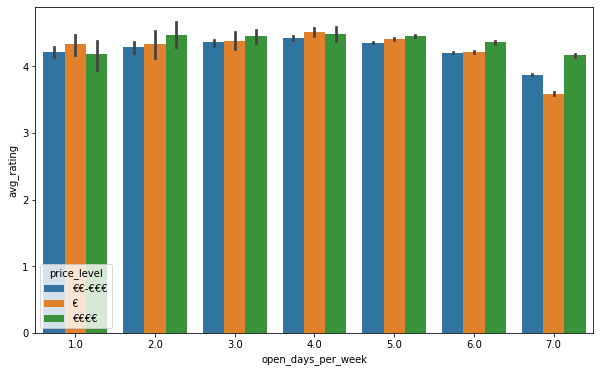

In [34]:
plt.figure(figsize = (10,6)) 
sns.barplot(data=rest_open,
           x='open_days_per_week',
           y='avg_rating',
           hue='price_level')

**e. Regression analysis**

In [35]:
import statsmodels.api as sm
from scipy import stats

In [36]:
#list the variables we want to add to our regression analysis
var = ['cuisine_fr', 'cuisine_ff', 'vegetarian', 'vegan', 'gluten', 'open_days_per_week', 'total_reviews_count']

In [37]:
restaurant.open_days_per_week = restaurant.open_days_per_week.fillna(0)

In [38]:
restaurant.total_reviews_count = restaurant.total_reviews_count.fillna(0)

In [39]:
rest_lr = restaurant[['avg_rating','cuisine_fr', 'cuisine_ff', 'vegetarian', 'vegan', 'gluten', 'open_days_per_week', 'total_reviews_count']]

In [40]:
rest_lr = rest_lr.loc[rest_lr.avg_rating.notnull()]

In [41]:
X = sm.add_constant(rest_lr[var])
Y = rest_lr[['avg_rating']]
lr = sm.OLS(Y,X)
res = lr.fit()

In [42]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_rating   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1053.
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:17:29   Log-Likelihood:            -1.5530e+05
No. Observations:              144475   AIC:                         3.106e+05
Df Residuals:                  144467   BIC:                         3.107e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.9039      0.004   1107.534      0.000       3.897       3.911
cuisine_fr              0.1623      0.004     41.510      0.000       0.155       0.170
cuisine_ff             -0.3114      0.008    -38.179      0.000      -0.327      -0.295
vegetarian              0.2401      0.006     41.548      0.000       0.229       0.251
vegan                   0.1526      0.010     15.368      0.000       0.133       0.172
gluten                  0.1480      0.015      9.753      0.000       0.118       0.178
open_days_per_week      0.0042      0.001      6.599      0.000       0.003       0.005
total_reviews_count    -0.0003   9.77e-06    -26.534      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    21334.214   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38852.035
Skew:                          -0.952   Prob(JB):                         0.00
Kurtosis:                       4.681   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
rest_lr['rating_predict'] = res.predict(X)

In [44]:
r2 = np.sqrt(((rest_lr['rating_predict']-rest_lr['avg_rating'])**2).mean())

In [45]:
r2

0.7089390412821154

**4. Detail analysis on categorical data**

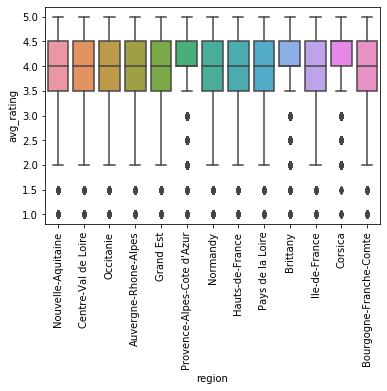

In [46]:
plt.xticks(rotation=90)
sns.boxplot(data=restaurant, 
            x = 'region',
            y = 'avg_rating')

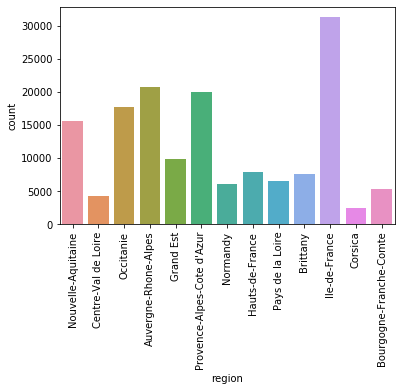

In [47]:
plt.xticks(rotation=90)
sns.countplot(data=restaurant,
             x='region')

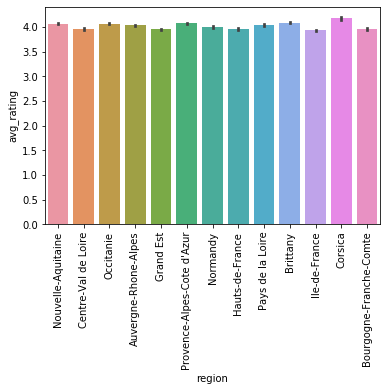

In [48]:
plt.xticks(rotation=90)
sns.barplot(data=restaurant, 
            x = 'region',
            y = 'avg_rating')

In [49]:
pip install pygal_maps_fr

Note: you may need to restart the kernel to use updated packages.


In [50]:
import pygal.maps.fr
from pygal.maps.fr import aggregate_regions

In [126]:
# clean the dataframe from null rows
rest_loc = restaurant[restaurant.region.notnull()]

In [167]:
# clean the dataframe for English name
rest_loc.replace(to_replace="Normandy", value="Normandie", inplace=True)
rest_loc.replace(to_replace="Brittany", value="Bretagne", inplace=True)
rest_loc.replace(to_replace="Corsica", value="Corse", inplace=True)
rest_loc.replace(to_replace="Auvergne-Rhone-Alpes", value="Auvergne-Rhône-Alpes", inplace=True)
rest_loc.replace(to_replace="Provence-Alpes-Cote d'Azur", value="Provence-Alpes-Côte d'Azur", inplace=True)
rest_loc.replace(to_replace="Bourgogne-Franche-Comte", value="Bourgogne-Franche-Comté", inplace=True)

/Users/Anh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [195]:
# vizualisation of average rating by region #solution 1
import pygal.maps.fr

fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Restaurant average ratings by region'
fr_chart.add('In France', {
'11': rest_loc.loc[rest_loc.region.str.contains("Ile-de-France")]['avg_rating'].mean(), 
'21': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['avg_rating'].mean(),
'22': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['avg_rating'].mean(),
'23': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['avg_rating'].mean(),
'24': rest_loc.loc[rest_loc.region.str.contains("Centre-Val-de-Loire")]['avg_rating'].mean(),
'25': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['avg_rating'].mean(),
'26': rest_loc.loc[rest_loc.region.str.contains("Bourgogne-Franche-Comte")]['avg_rating'].mean(),
'31': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['avg_rating'].mean(),
'41': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['avg_rating'].mean(),
'42': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['avg_rating'].mean(),
'43': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['avg_rating'].mean(),
'53': rest_loc.loc[rest_loc.region.str.contains("Brittany")]['avg_rating'].mean(),
'52': rest_loc.loc[rest_loc.region.str.contains("Pays de la Loire")]['avg_rating'].mean(),
'54': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['avg_rating'].mean(),
'72': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['avg_rating'].mean(),
'73': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['avg_rating'].mean(),
'74': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['avg_rating'].mean(),
'82': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhône-Alpes")]['avg_rating'].mean(),
'83': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhône-Alpes")]['avg_rating'].mean(),
'91': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['avg_rating'].mean(),
'93': rest_loc.loc[rest_loc.region.str.contains("Provence-Alpes-Côte d'Azur")]['avg_rating'].mean(),
'94': rest_loc.loc[rest_loc.region.str.contains("Corse")]['avg_rating'].mean()
})

fr_chart.render_to_file('regions_avg_rating.svg') 


fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Gluten frr restaurants by region'
fr_chart.add('In France', {
'11': rest_loc.loc[rest_loc.region.str.contains("Ile-de-France")]['gluten'].mean(), 
'21': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['gluten'].mean(),
'22': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['gluten'].mean(),
'23': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['gluten'].mean(),
'24': rest_loc.loc[rest_loc.region.str.contains("Centre-Val de Loire")]['gluten'].mean(),
'25': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['gluten'].mean(),
'26': rest_loc.loc[rest_loc.region.str.contains("Bourgogne-Franche-Comte")]['gluten'].mean(),
'31': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['gluten'].mean(),
'41': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['gluten'].mean(),
'42': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['gluten'].mean(),
'43': rest_loc.loc[rest_loc.region.str.contains("Bourgogne-Franche-Comte")]['gluten'].mean(),
'53': rest_loc.loc[rest_loc.region.str.contains("Brittany")]['gluten'].mean(),
'52': rest_loc.loc[rest_loc.region.str.contains("Pays de la Loire")]['gluten'].mean(),
'54': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['gluten'].mean(),
'72': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['gluten'].mean(),
'73': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['gluten'].mean(),
'74': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['gluten'].mean(),
'82': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhone-Alpes")]['gluten'].mean(),
'83': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhone-Alpes")]['gluten'].mean(),
'91': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['gluten'].mean(),
'93': rest_loc.loc[rest_loc.region.str.contains("Provence-Alpes-Cote d'Azur")]['gluten'].mean(),
'94': rest_loc.loc[rest_loc.region.str.contains("Corsica")]['gluten'].mean()
})

fr_chart.render_to_file('gluten4_avg.svg')  

fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Vegetarian restaurants by region'
fr_chart.add('In France', {
'11': rest_loc.loc[rest_loc.region.str.contains("Ile-de-France")]['vegetarian'].mean(), 
'21': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['vegetarian'].mean(),
'22': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['vegetarian'].mean(),
'23': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['vegetarian'].mean(),
'24': rest_loc.loc[rest_loc.region.str.contains("Centre-Val de Loire")]['vegetarian'].mean(),
'25': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['vegetarian'].mean(),
'26': rest_loc.loc[rest_loc.region.str.contains("Bourgogne-Franche-Comte")]['vegetarian'].mean(),
'31': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['vegetarian'].mean(),
'41': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['vegetarian'].mean(),
'42': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['vegetarian'].mean(),
'43': rest_loc.loc[rest_loc.region.str.contains("Bourgogne-Franche-Comte")]['vegetarian'].mean(),
'53': rest_loc.loc[rest_loc.region.str.contains("Brittany")]['vegetarian'].mean(),
'52': rest_loc.loc[rest_loc.region.str.contains("Pays de la Loire")]['vegetarian'].mean(),
'54': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['vegetarian'].mean(),
'72': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['vegetarian'].mean(),
'73': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['vegetarian'].mean(),
'74': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['vegetarian'].mean(),
'82': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhone-Alpes")]['vegetarian'].mean(),
'83': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhone-Alpes")]['vegetarian'].mean(),
'91': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['vegetarian'].mean(),
'93': rest_loc.loc[rest_loc.region.str.contains("Provence-Alpes-Cote d'Azur")]['vegetarian'].mean(),
'94': rest_loc.loc[rest_loc.region.str.contains("Corsica")]['vegetarian'].mean()
})

fr_chart.render_to_file('vegetarian4_avg.svg')

fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Vegan restaurants by region'
fr_chart.add('In France', {
'11': rest_loc.loc[rest_loc.region.str.contains("Ile-de-France")]['vegan'].mean(), 
'21': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['vegan'].mean(),
'22': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['vegan'].mean(),
'23': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['vegan'].mean(),
'24': rest_loc.loc[rest_loc.region.str.contains("Centre-Val de Loire")]['vegan'].mean(),
'25': rest_loc.loc[rest_loc.region.str.contains("Normandy")]['vegan'].mean(),
'26': rest_loc.loc[rest_loc.region.str.contains("Bourgogne-Franche-Comte")]['vegan'].mean(),
'31': rest_loc.loc[rest_loc.region.str.contains("Hauts-de-France")]['vegan'].mean(),
'41': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['vegan'].mean(),
'42': rest_loc.loc[rest_loc.region.str.contains("Grand Est")]['vegan'].mean(),
'43': rest_loc.loc[rest_loc.region.str.contains("Bourgogne-Franche-Comte")]['vegan'].mean(),
'53': rest_loc.loc[rest_loc.region.str.contains("Brittany")]['vegan'].mean(),
'52': rest_loc.loc[rest_loc.region.str.contains("Pays de la Loire")]['vegan'].mean(),
'54': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['vegan'].mean(),
'72': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['vegan'].mean(),
'73': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['vegan'].mean(),
'74': rest_loc.loc[rest_loc.region.str.contains("Nouvelle-Aquitaine")]['vegan'].mean(),
'82': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhone-Alpes")]['vegan'].mean(),
'83': rest_loc.loc[rest_loc.region.str.contains("Auvergne-Rhone-Alpes")]['vegan'].mean(),
'91': rest_loc.loc[rest_loc.region.str.contains("Occitanie")]['vegan'].mean(),
'93': rest_loc.loc[rest_loc.region.str.contains("Provence-Alpes-Cote d'Azur")]['vegan'].mean(),
'94': rest_loc.loc[rest_loc.region.str.contains("Corsica")]['vegan'].mean()
})

fr_chart.render_to_file('vegan3_avg.svg')  

In [168]:
region = pd.read_csv('mapping_region.csv', delimiter=';')

In [169]:
region['region']=region['Nouveau Nom']

In [170]:
rest_loc2 = pd.merge(rest_loc, region, on="region")

In [171]:
rest_dict = rest_loc2[['region','Nouveau Code', 'Anciens Code']].to_dict(orient='records')

In [178]:
d = []
for e in rest_dict :
    if e not in d:
        d.append(e)

In [179]:
rest_loc_dict = {}
for i in d:
    rest_loc_dict[i['Anciens Code']] = rest_loc2.loc[rest_loc2['Nouveau Code']==i['Nouveau Code']]['avg_rating'].mean()

In [180]:
# vizualisation of average rating by region #solution 2
fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Restaurant average ratings by region'
fr_chart.add('In France', rest_loc_dict)
fr_chart.render_to_file('bar_chart.svg')